**ogs@jupyter-lab: Cs sorption using the Look-up Table (LT) approach**

<table><tr>
<td> <img src="../ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="../icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

The LT approach is enabled for the same simulation in `caesium-progressive.prj`. 

In [56]:
!xmllint --noout caesium-lookup-table.prj

### ***1) Run OGS-6-LT with `ogs6py`***

In [57]:
from ogs6py import ogs
model = ogs.OGS(PROJECT_FILE="caesium-lookup-table.prj")
print(">>> model running <<<")
#import os
#os.system("mkdir output")
model.run_model(write_logs=False, args="-o ./output")

>>> model running <<<
OGS finished with project file caesium-lookup-table.prj.
Execution took 23.828838348388672 s


### ***2) Sparse LT output***

>>> print results <<<


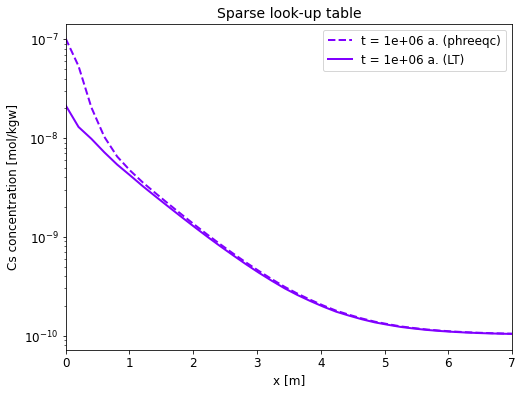

In [58]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.style.use('../notebook.mplstyle')
print(">>> print results <<<")

pvdfile_table = vtuIO.PVDIO("./output/outTable.pvd", dim=1)
pvdfile_phreeqc = vtuIO.PVDIO("./output/outProgressive.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=20, num=100)]
r_x = np.array(xaxis)[:,0]
time_pvd = pvdfile.timesteps

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

time = [
    find_nearest(time_pvd, 3.1536e13)
]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    y_phreeqc = pvdfile_phreeqc.read_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x,y_phreeqc, label='t = {:.0e} a. (phreeqc)'.format(t/365/3600/24), color=color, linestyle="--")
    y_table = pvdfile_table.read_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x, y_table, label='t = {:.0e} a. (LT)'.format(t/365/3600/24), color=color, linestyle="-")
    
plt.yscale("log")
plt.title("Sparse look-up table")
plt.xlim(0,7)
plt.xlabel('x [m]')
plt.ylabel('Cs concentration [mol/kgw]')

plt.legend()
plt.show()

### ***3) Dense LT output***

The model can be runned again by using a more dense look-up table (`cs-opa-table-30.txt`), which should increase the agreement with the full-coupling simulation. This can be done quickly by using a `OpenGeoSysProjectDiff` file (`caesium-LT-30.xml`) which is used to replace the name of the tabular file.

In [59]:
from ogs6py import ogs
model = ogs.OGS(PROJECT_FILE="caesium-LT-30.xml")
print(">>> model running <<<")
model.run_model(write_logs=False, args="-o ./output")

>>> model running <<<
OGS finished with project file caesium-LT-30.xml.
Execution took 32.419981956481934 s


>>> print results <<<


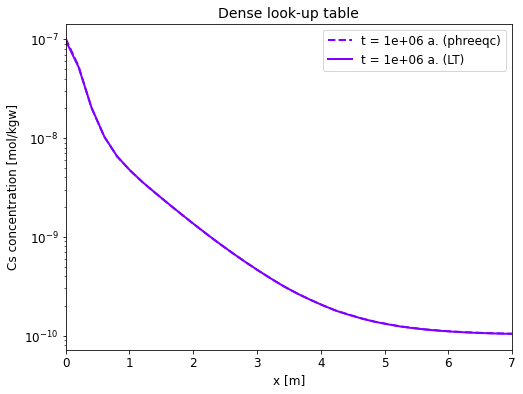

In [60]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.style.use('../notebook.mplstyle')
print(">>> print results <<<")

pvdfile_table = vtuIO.PVDIO("./output/outTable.pvd", dim=1)
pvdfile_phreeqc = vtuIO.PVDIO("./output/outProgressive.pvd", dim=1)

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=20, num=100)]
r_x = np.array(xaxis)[:,0]
time_pvd = pvdfile.timesteps

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

time = [
    find_nearest(time_pvd, 3.1536e13)
]

color=iter(cm.rainbow(np.linspace(0,1,len(time))))
for t, color in zip(time, color):
    y_phreeqc = pvdfile_phreeqc.read_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x,y_phreeqc, label='t = {:.0e} a. (phreeqc)'.format(t/365/3600/24), color=color, linestyle="--")
    y_table = pvdfile_table.read_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x, y_table, label='t = {:.0e} a. (LT)'.format(t/365/3600/24), color=color, linestyle="-")
    
plt.yscale("log")
plt.title("Dense look-up table")
plt.xlim(0,7)
plt.xlabel('x [m]')
plt.ylabel('Cs concentration [mol/kgw]')

plt.legend()
plt.show()